In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ddrgere/UCI HAR Dataset.names
/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/activity_labels.txt
/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/README.txt
/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/features_info.txt
/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/features.txt
/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/test/subject_test.txt
/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt
/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt
/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/body_acc_y_test.txt
/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/total_acc_y_test.txt
/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/total_acc_z_test.txt
/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/body_acc_z_test.txt
/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/

In [3]:
#  import Libraries
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#
# Combining the data from the UCI HAR Dataset into a more usable format.
# The data is combined into a single csv file for each subject and activity. 
# The data is then stored in the Combined folder.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Give the path of the test and train folder of UCI HAR Dataset
train_path = "/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/train"
test_path = "/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/test"

# Dictionary of activities. Provided by the dataset.
ACTIVITIES = {
    1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'             ,
}

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Traing Data
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_x_train.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_y_train.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_z_train.txt"),delim_whitespace=True,header=None)


# Read the subject IDs
subject_train = pd.read_csv(os.path.join(train_path,"subject_train.txt"),delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(os.path.join(train_path,"y_train.txt"),delim_whitespace=True,header=None)


# Toggle through all the subjects.
for subject in np.unique(subject_train.values):

    sub_idxs = np.where( subject_train.iloc[:,0] == subject )[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        # make the folder directory if it does not exist
        if not os.path.exists(os.path.join("Combined","Train",ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined","Train",ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:,0] == label].index

        accx = []
        accy = []
        accz = []

        for idx in label_idxs:
            if accx is not None:
                accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                accz = np.hstack((accz,total_acc_z.loc[idx][64:]))

            else:
                accx = total_acc_x.loc[idx]
                accy = total_acc_y.loc[idx]
                accz = total_acc_z.loc[idx]

        # saving the data into csv file
        data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
        save_path = os.path.join("Combined","Train",ACTIVITIES[label],f"Subject_{subject}.csv")
        data.to_csv(save_path,index=False)

print("Done Combining the training data")


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Test Data               
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_x_test.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_y_test.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_z_test.txt"),delim_whitespace=True,header=None)

# Read the subject IDs
subject_test = pd.read_csv(os.path.join(test_path,"subject_test.txt"),delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(os.path.join(test_path,"y_test.txt"),delim_whitespace=True,header=None)

# Toggle through all the subjects.
for subject in np.unique(subject_test.values):
    
        sub_idxs = np.where( subject_test.iloc[:,0] == subject )[0]
        labels = y.loc[sub_idxs]

        # Toggle through all the labels.
        for label in np.unique(labels.values):
    
            if not os.path.exists(os.path.join("Combined","Test",ACTIVITIES[label])):
                os.makedirs(os.path.join("Combined","Test",ACTIVITIES[label]))
    
            label_idxs = labels[labels.iloc[:,0] == label].index
    
            accx = []
            accy = []
            accz = []
            for idx in label_idxs:
                if accx is not None:
                    accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                    accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                    accz = np.hstack((accz,total_acc_z.loc[idx][64:]))
    
                else:
                    accx = total_acc_x.loc[idx]
                    accy = total_acc_y.loc[idx]
                    accz = total_acc_z.loc[idx]
    
            # saving the data into csv file
            data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
            save_path = os.path.join("Combined","Test",ACTIVITIES[label],f"Subject_{subject}.csv")
            data.to_csv(save_path,index=False)

print("Done Combining the testing data")
print("Done Combining the data")

#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

/tmp/ipykernel_35/3949016210.py:29: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_x_train.txt"),delim_whitespace=True,header=None)
/tmp/ipykernel_35/3949016210.py:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_y = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_y_train.txt"),delim_whitespace=True,header=None)
/tmp/ipykernel_35/3949016210.py:31: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_z = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_z_train.txt"),delim_whitespace=True,header=None)
/tmp/ipykernel_35/3949016210.py:35: FutureWarning: The 'delim_whitespace'

Done Combining the training data


/tmp/ipykernel_35/3949016210.py:84: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_x = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_x_test.txt"),delim_whitespace=True,header=None)
/tmp/ipykernel_35/3949016210.py:85: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_y = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_y_test.txt"),delim_whitespace=True,header=None)
/tmp/ipykernel_35/3949016210.py:86: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_z = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_z_test.txt"),delim_whitespace=True,header=None)
/tmp/ipykernel_35/3949016210.py:89: FutureWarning: The 'delim_whitespace' keywo

Done Combining the testing data
Done Combining the data


In [28]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#
# Creating the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("/kaggle/working/Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=




Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


**DATA ANALYSIS**

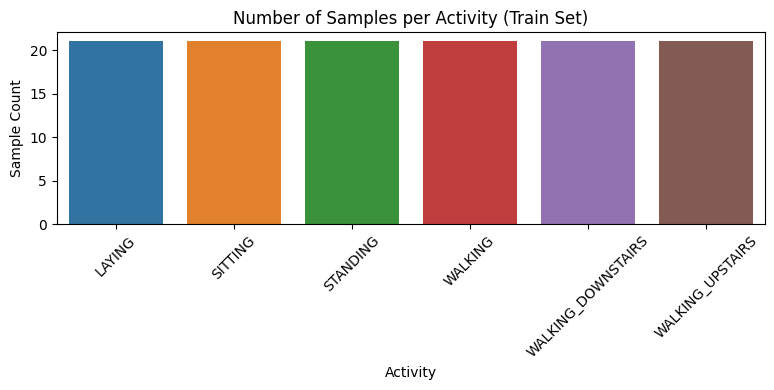

In [48]:
base_dir = '/kaggle/working/Combined/Train'
activity_names = sorted([act for act in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, act))])

activity_files = {}

for activity in activity_names:
    activity_files[activity] = len([f for f in os.listdir(os.path.join(base_dir, activity)) if f.endswith('.csv')])

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=list(activity_files.keys()), y=list(activity_files.values()))
plt.xticks(rotation=45)
plt.title("Number of Samples per Activity (Train Set)")
plt.ylabel("Sample Count")
plt.xlabel("Activity")
plt.tight_layout()
plt.show()


In [49]:
file_sample = os.listdir(os.path.join(base_path, 'WALKING'))[0]
data_sample = pd.read_csv(os.path.join(base_path, 'WALKING', file_sample), header=None)

print(f"Sample shape: {data_sample.shape}")
data_sample.head()


Sample shape: (3649, 3)


,0,1,2
0,accx,accy,accz
1,0.9249023,0.02340067,0.1525221
2,1.020792,-0.02363948,0.06109736
3,1.111807,-0.06618715,0.03753407
4,1.289348,-0.1641921,0.06794626


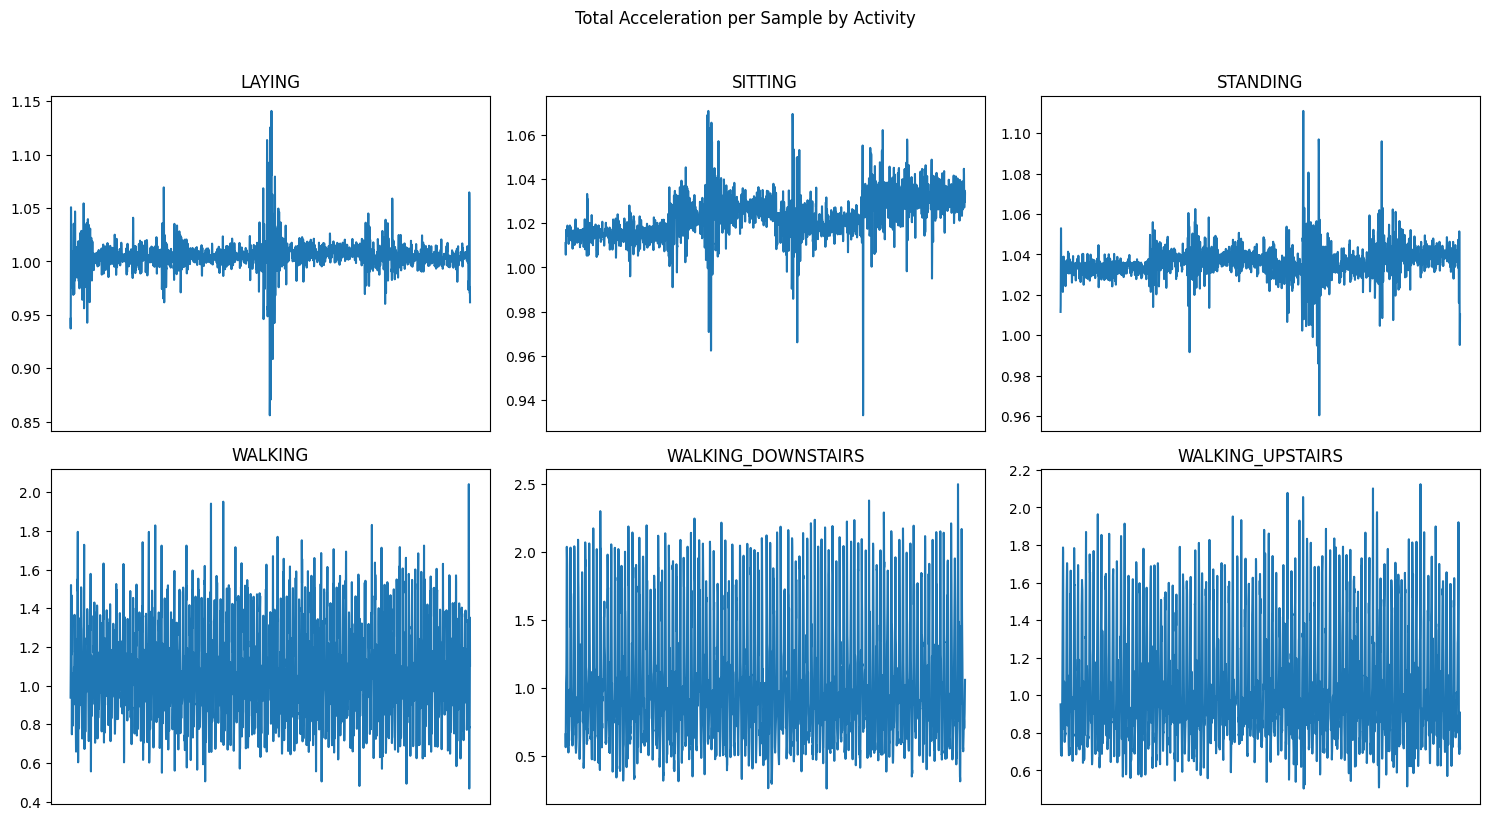

In [50]:
from glob import glob

plt.figure(figsize=(15, 8))

for i, activity in enumerate(activity_names):
    file_path = glob(os.path.join(base_dir, activity, '*.csv'))[0]
    df = pd.read_csv(file_path, header=None)

    df = df.apply(pd.to_numeric, errors='coerce')
    df.dropna(inplace=True)

    total_magnitude = np.sqrt((df ** 2).sum(axis=1))

    plt.subplot(2, 3, i + 1)
    plt.plot(total_magnitude)
    plt.title(activity)
    plt.xticks([])

plt.suptitle("Total Acceleration per Sample by Activity", y=1.02)
plt.tight_layout()
plt.show()


In [51]:
print(df.isnull().sum())

0    0
1    0
2    0
dtype: int64


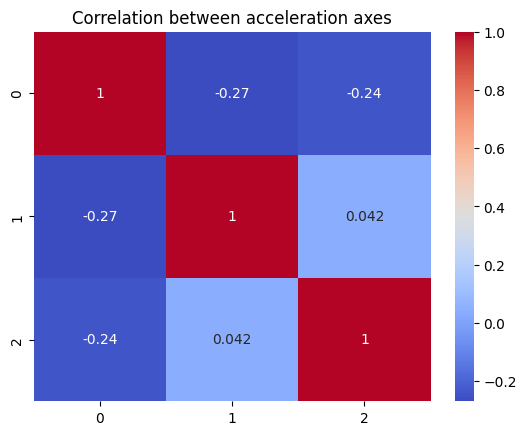

In [53]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between acceleration axes")
plt.show()

The correlation matrix confirms that the accelerations along different axes are not significantly correlated with one another.

In [54]:
for act in activity_names:
    folder = os.path.join(base_dir, act)
    filename = os.listdir(folder)[0]
    df = pd.read_csv(os.path.join(folder, filename), header=None)

    # Convert all entries to numeric values
    df = df.apply(pd.to_numeric, errors='coerce')
    df.dropna(inplace=True)

    # Assign axis labels to columns
    df.columns = ['acc_x', 'acc_y', 'acc_z'][:df.shape[1]]

    # Calculate the magnitude of acceleration
    df['acc_total'] = np.sqrt(df['acc_x']**2 + df['acc_y']**2 + df['acc_z']**2)

    mean_val = df['acc_total'].mean()
    std_val = df['acc_total'].std()

    print(f"{act:<20} | Mean Acc Magnitude: {mean_val:.2f} | Std: {std_val:.2f}")


LAYING               | Mean Acc Magnitude: 1.01 | Std: 0.01
SITTING              | Mean Acc Magnitude: 1.02 | Std: 0.01
STANDING             | Mean Acc Magnitude: 1.04 | Std: 0.01
WALKING              | Mean Acc Magnitude: 1.06 | Std: 0.24
WALKING_DOWNSTAIRS   | Mean Acc Magnitude: 1.04 | Std: 0.47
WALKING_UPSTAIRS     | Mean Acc Magnitude: 1.06 | Std: 0.32


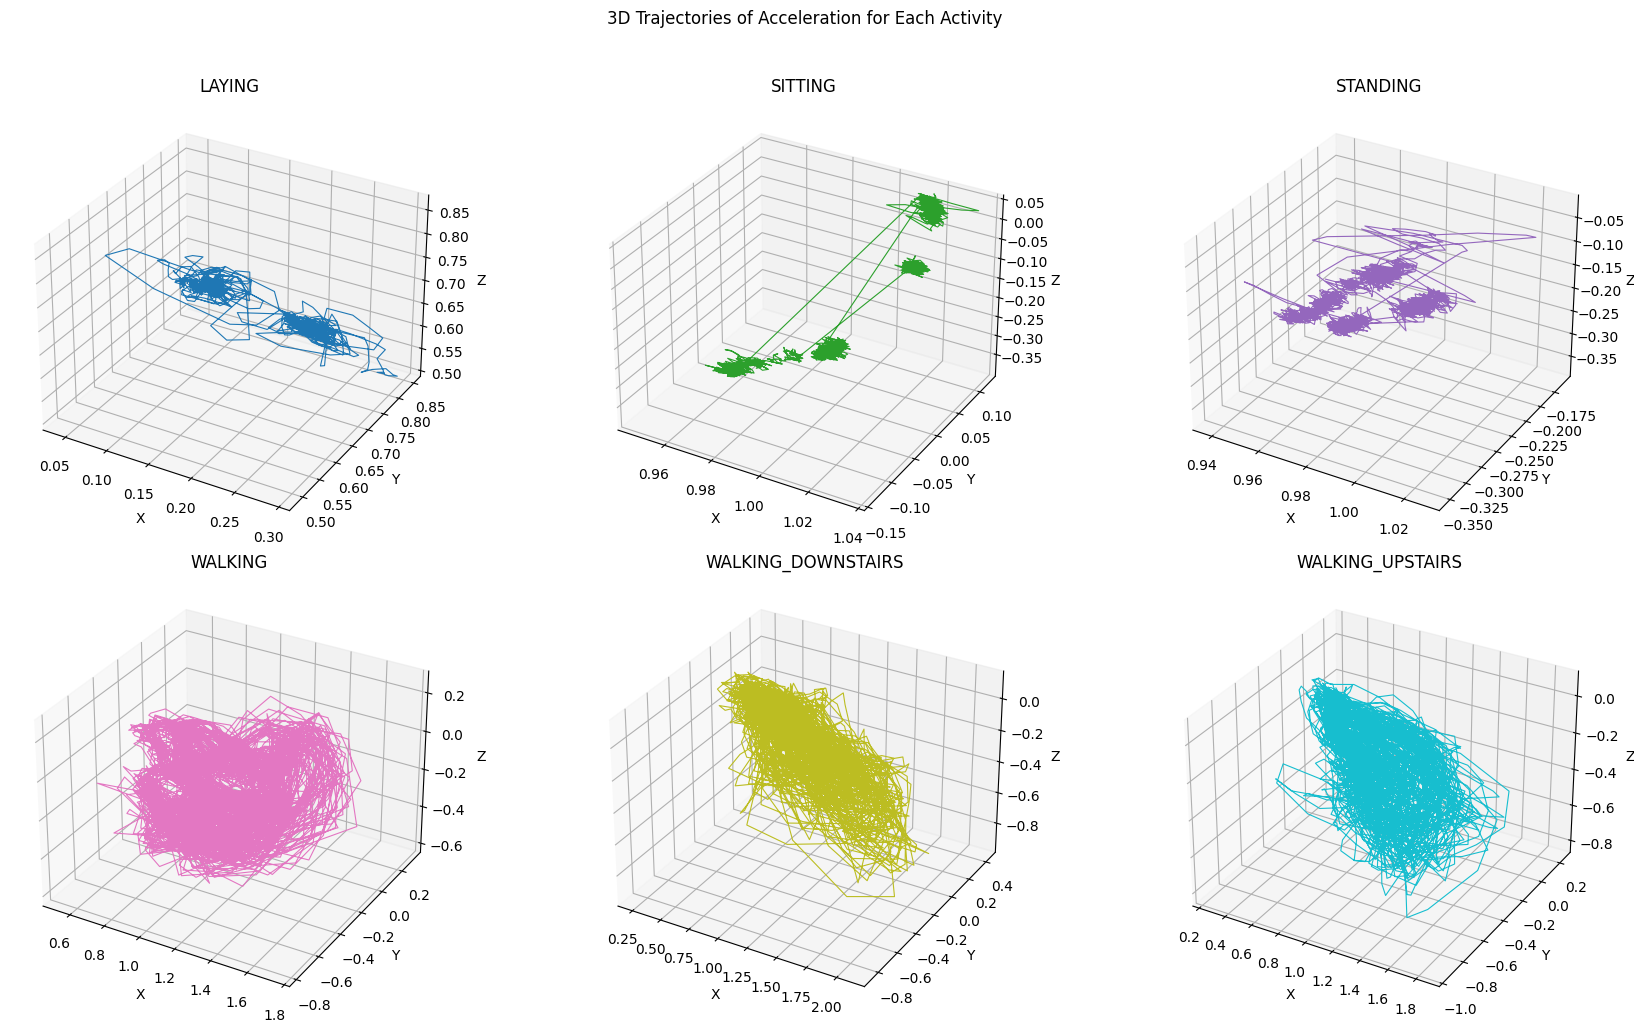

In [57]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

colors = plt.cm.tab10(np.linspace(0, 1, len(activities)))  

fig = plt.figure(figsize=(18, 10))

for i, activity in enumerate(activities):
    path = os.path.join(base_path, activity)
    file = sorted(os.listdir(path))[5]
    df = pd.read_csv(os.path.join(path, file), header=None)

    # Convert to numeric and clean
    df = df.apply(pd.to_numeric, errors='coerce')
    df.dropna(inplace=True)
    df.columns = ['acc_x', 'acc_y', 'acc_z'][:df.shape[1]]

    # Subplot
    ax = fig.add_subplot(2, 3, i + 1, projection='3d')
    ax.plot(df['acc_x'], df['acc_y'], df['acc_z'], color=colors[i], linewidth=0.8)
    ax.set_title(f"{activity}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

plt.suptitle("3D Trajectories of Acceleration for Each Activity", y=1.02)
plt.tight_layout()
plt.show()


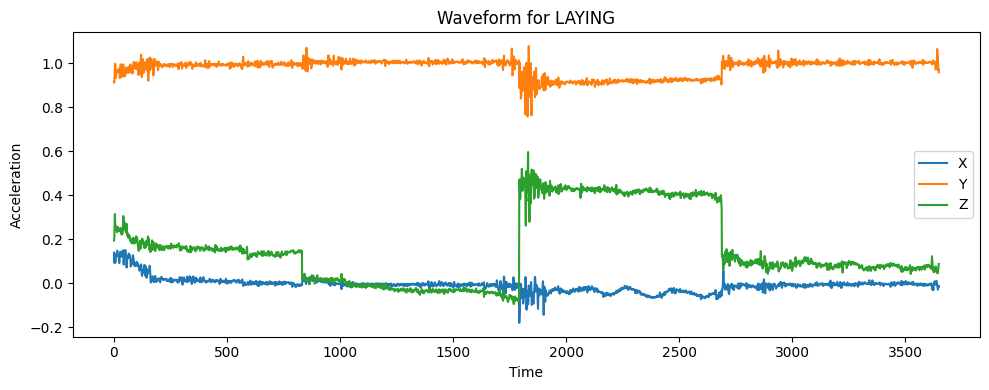

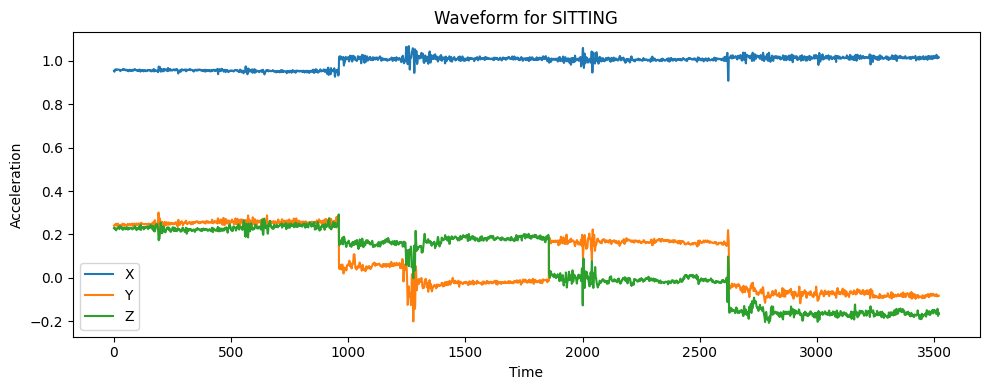

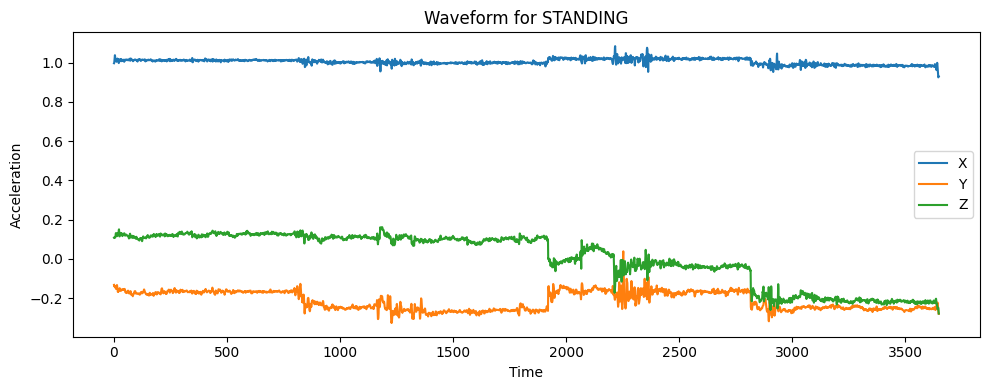

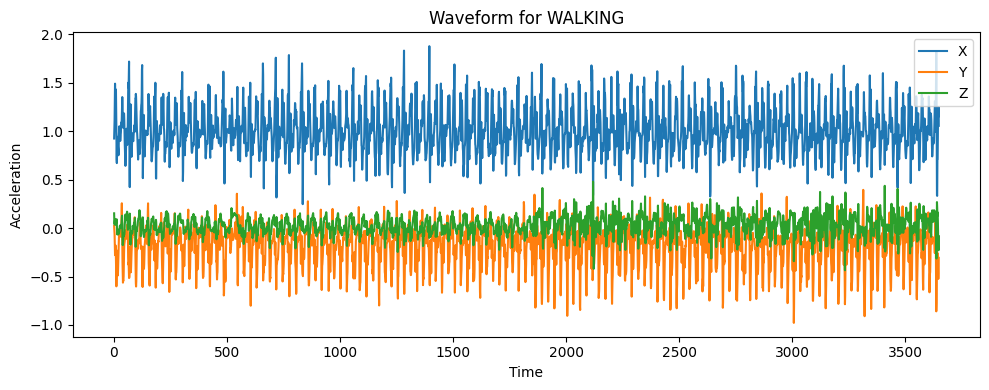

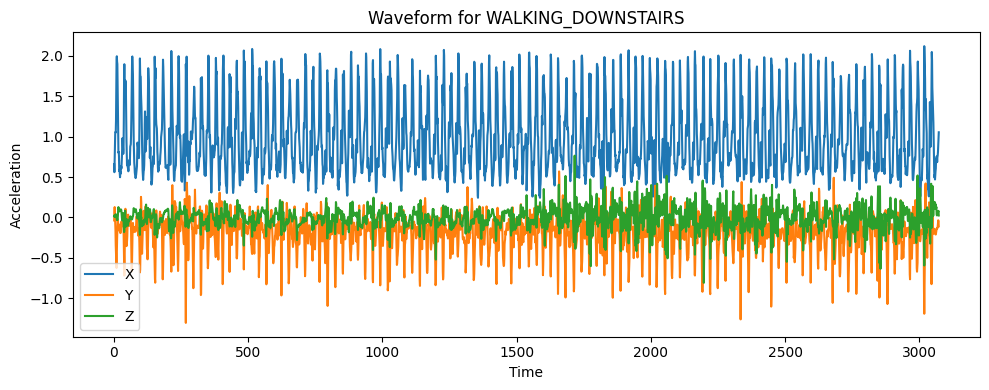

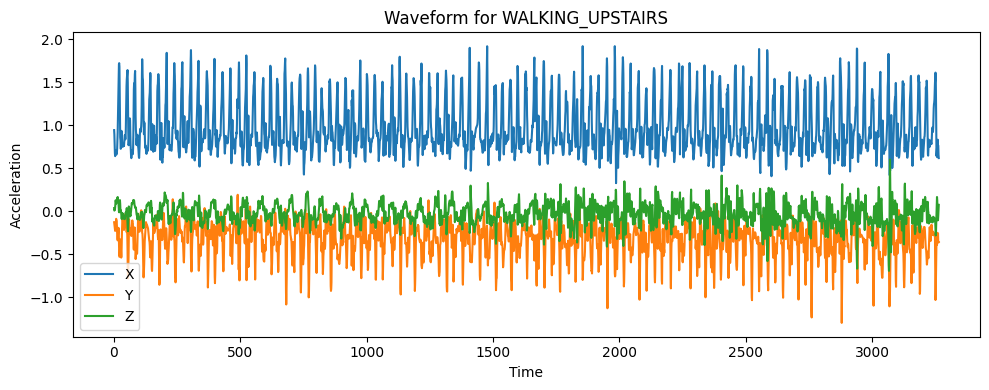

In [58]:
for activity in activities:
    path = os.path.join(base_path, activity)
    file = os.listdir(path)[0]
    df = pd.read_csv(os.path.join(path, file), header=None)

    df = df.apply(pd.to_numeric, errors='coerce')
    df.dropna(inplace=True)
    df.columns = ['acc_x', 'acc_y', 'acc_z'][:df.shape[1]]

    plt.figure(figsize=(10, 4))
    plt.plot(df['acc_x'], label='X')
    plt.plot(df['acc_y'], label='Y')
    plt.plot(df['acc_z'], label='Z')
    plt.title(f"Waveform for {activity}")
    plt.xlabel("Time")
    plt.ylabel("Acceleration")
    plt.legend()
    plt.tight_layout()
    plt.show()

For all activities like **LAYING**, **SITTING**, **STANDING**, and **WALKING**, the average acceleration magnitude is close to **1.0g**. This makes sense because a device at rest under Earth's gravity feels about **1g** of acceleration.

- In **static activities** (like *LAYING* or *SITTING*), the body doesn't move much, so the acceleration stays steady. This gives a **low standard deviation**.
  
- In **dynamic activities** (like *WALKING*), the body moves more, causing the acceleration to vary. This leads to a **higher standard deviation**.

These patterns make it easier to tell the difference between still and active movements just by seeing how much the acceleration varies.


**DATA VISUALISATION**



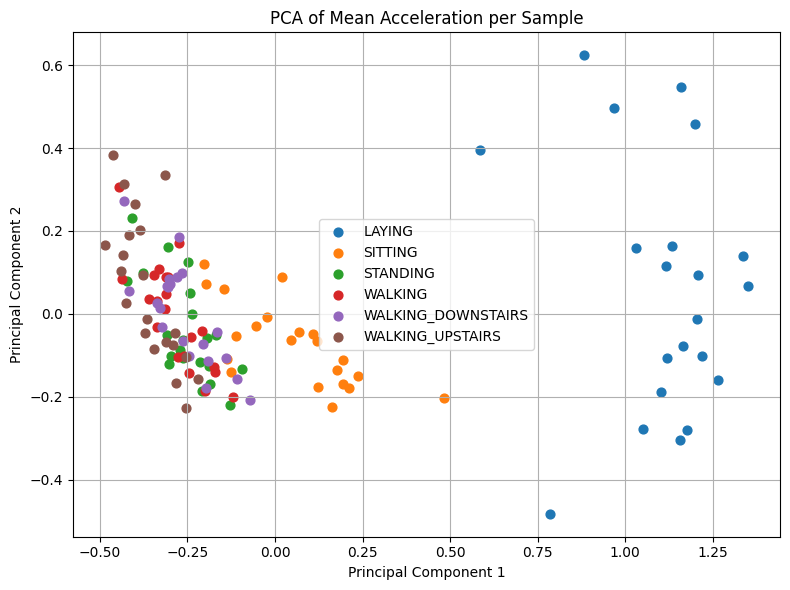

In [61]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

features = []
labels = []

for activity in activities:
    folder = os.path.join(base_path, activity)
    for fname in sorted(os.listdir(folder))[:21]:  # Picking first 21 samples
        df = pd.read_csv(os.path.join(folder, fname), header=None)
        df = df.apply(pd.to_numeric, errors='coerce')
        df.dropna(inplace=True)
        df.columns = ['acc_x', 'acc_y', 'acc_z'][:df.shape[1]]
        
        mean_vector = df.mean().values  # shape (3,)
        features.append(mean_vector)
        labels.append(activity)

X = np.array(features)
y = np.array(labels)

# Applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.figure(figsize=(8, 6))
for activity in activities:
    idx = y == activity
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=activity, s=40)

plt.title("PCA of Mean Acceleration per Sample")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

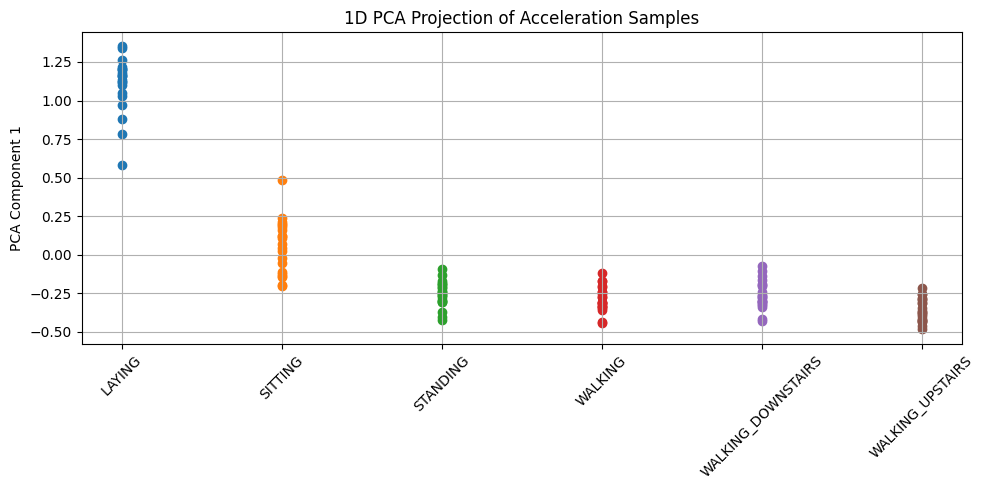

In [39]:
# Reducing to a single principal component
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

# Plot the 1D PCA Projection
plt.figure(figsize=(10, 5))

for i, activity in enumerate(activities):
    idx = np.array(y) == activity
    x_vals = np.random.normal(i, 0.05, size=idx.sum())  # add slight jitter for visibility
    plt.scatter(x_vals, X_pca[idx], label=activity)

plt.xticks(ticks=range(len(activities)), labels=activities, rotation=45)
plt.ylabel("PCA Component 1")
plt.title("1D PCA Projection of Mean Acceleration")
plt.grid(True)
plt.tight_layout()
plt.show()


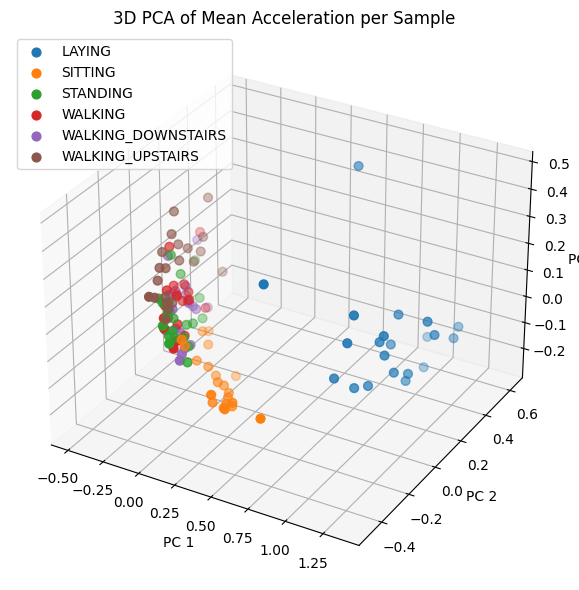

In [62]:
# Performing PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

#  3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for i, activity in enumerate(activities):
    idx = np.array(y) == activity
    ax.scatter(X_pca[idx, 0], X_pca[idx, 1], X_pca[idx, 2],
               label=activity, s=40)

ax.set_title("3D PCA of Mean Acceleration per Sample")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
ax.legend()
plt.tight_layout()
plt.show()


1. The plot shows which activities are naturally separable (e.g., **Walking** vs. **Laying**) and which may require more advanced feature engineering (e.g., **Sitting** vs. **Standing**).
2. **Laying**, **Sitting**, and **Standing** appear close together, suggesting similar acceleration patterns due to limited body movement.
3. **Walking**, **Walking Upstairs**, and **Walking Downstairs** are more spread out, indicating greater variation in motion.
4. **Walking Upstairs** and **Walking Downstairs** may overlap somewhat with regular **Walking**, but still show distinct patterns due to the inclined or declined movement.


In [41]:
pip install tsfel


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 1.5 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [45]:
import warnings
warnings.filterwarnings("ignore")

100%|██████████| 7352/7352 [03:10<00:00, 38.50it/s]


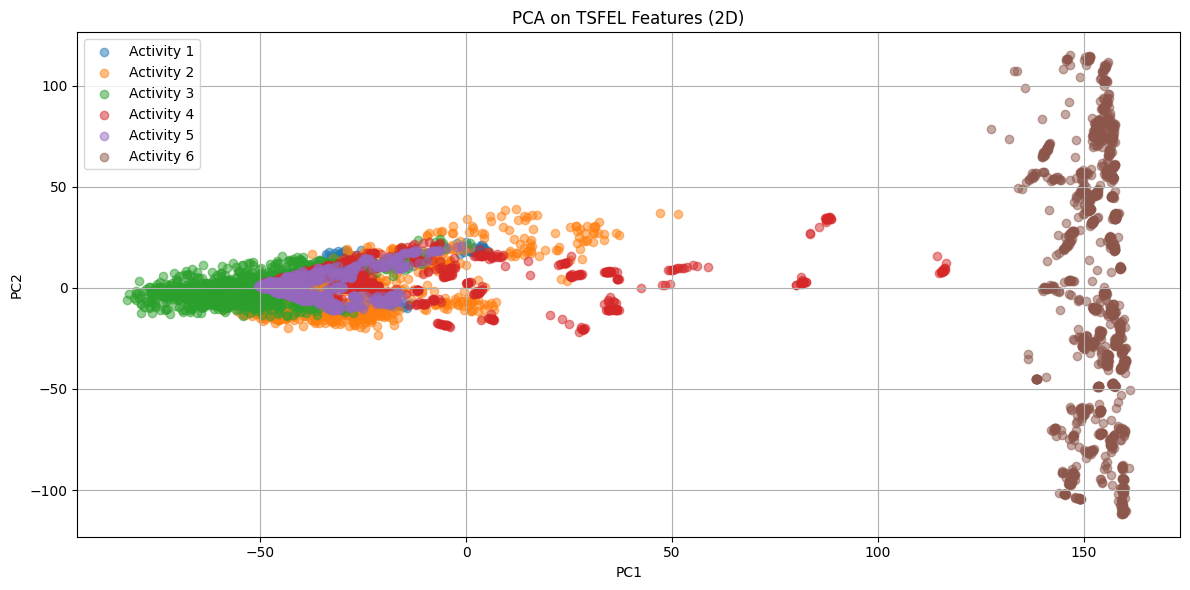

In [63]:
import pandas as pd
import numpy as np
import tsfel
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tqdm import tqdm

# Load the raw acceleration signals (each row = 128 samples)
acc_x = pd.read_csv('/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt', delim_whitespace=True, header=None)
acc_y = pd.read_csv('/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt', delim_whitespace=True, header=None)
acc_z = pd.read_csv('/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt', delim_whitespace=True, header=None)

# Load activity labels
y_train = pd.read_csv('/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', header=None)[0]

# Configure TSFEL to extract temporal and statistical features only
cfg = tsfel.get_features_by_domain(['temporal', 'statistical'])

X_features = []

# Loop through each sample to extract features from x, y, and z axes
for i in tqdm(range(len(acc_x))):
    try:
        fx = tsfel.time_series_features_extractor(cfg, acc_x.iloc[i], sampling_frequency=50, verbose=0)
        fy = tsfel.time_series_features_extractor(cfg, acc_y.iloc[i], sampling_frequency=50, verbose=0)
        fz = tsfel.time_series_features_extractor(cfg, acc_z.iloc[i], sampling_frequency=50, verbose=0)
        features = pd.concat([fx, fy, fz], axis=1)
        X_features.append(features.values.flatten())
    except Exception as e:
        print(f"Error at sample {i}: {e}")

# Convert feature list to numpy array and replace NaNs with zero
X_features = np.nan_to_num(np.array(X_features))

# Apply PCA to reduce the feature space to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_features)

# Plot the PCA results colored by activity label
plt.figure(figsize=(12, 6))
for label in np.unique(y_train):
    idx = y_train == label
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=f'Activity {label}', alpha=0.5)

plt.title("PCA on TSFEL Features (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


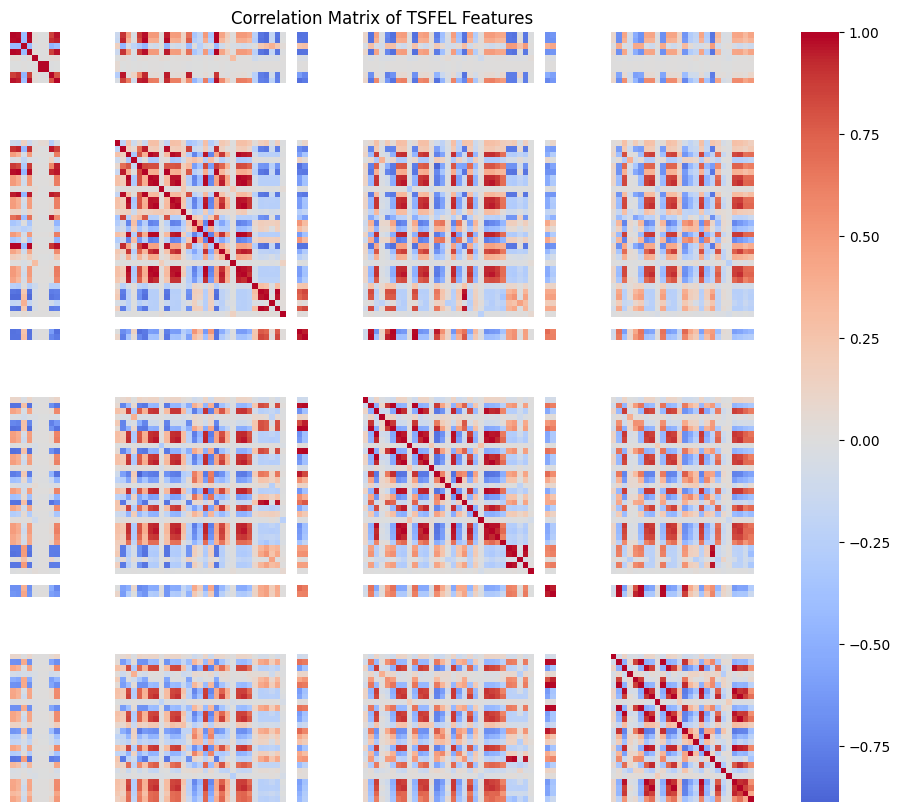

TSFEL feature pairs (> 0.9 correlation): 246


In [64]:
import seaborn as sns

df_features = pd.DataFrame(X_features)
corr_matrix_tsfel = df_features.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_tsfel, cmap='coolwarm', center=0, xticklabels=False, yticklabels=False)
plt.title("Correlation Matrix of TSFEL Features")
plt.show()

# Find feature pairs with high correlation (> 0.9 but not 1)
high_corr_pairs_tsfel = np.where((np.abs(corr_matrix_tsfel) > 0.9) & (np.abs(corr_matrix_tsfel) < 1.0))
redundant_provided = set()

for i, j in zip(*high_corr_pairs_tsfel):
    redundant_provided.add((min(i, j), max(i, j)))

print(f"TSFEL feature pairs (> 0.9 correlation): {len(redundant_provided)}")


In [65]:
Tsfel_Features = pd.DataFrame(X_features)

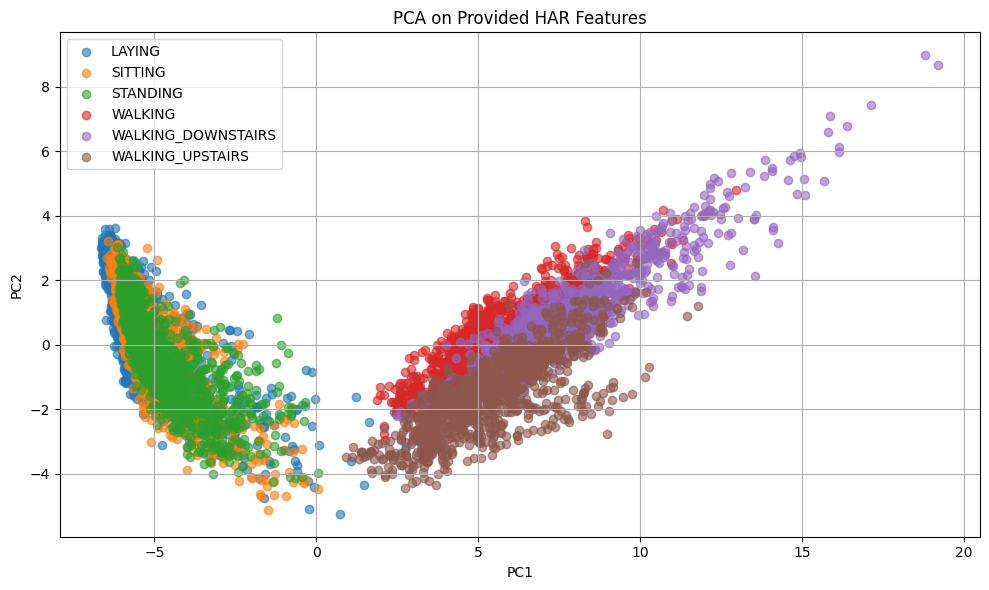

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Paths to feature and label files
X_path = "/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt"
y_path = "/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt"
label_names_path = "/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/activity_labels.txt"

# Load data
X = pd.read_csv(X_path, delim_whitespace=True, header=None)
y = pd.read_csv(y_path, header=None).values.flatten()

# Mapping numeric labels to activity names
label_map = pd.read_csv(label_names_path, delim_whitespace=True, header=None, index_col=0)
y_named = [label_map.loc[label].values[0] for label in y]

# Applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.figure(figsize=(10, 6))
for activity in np.unique(y_named):
    idx = np.array(y_named) == activity
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=activity, alpha=0.6)

plt.title("PCA on Provided HAR Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


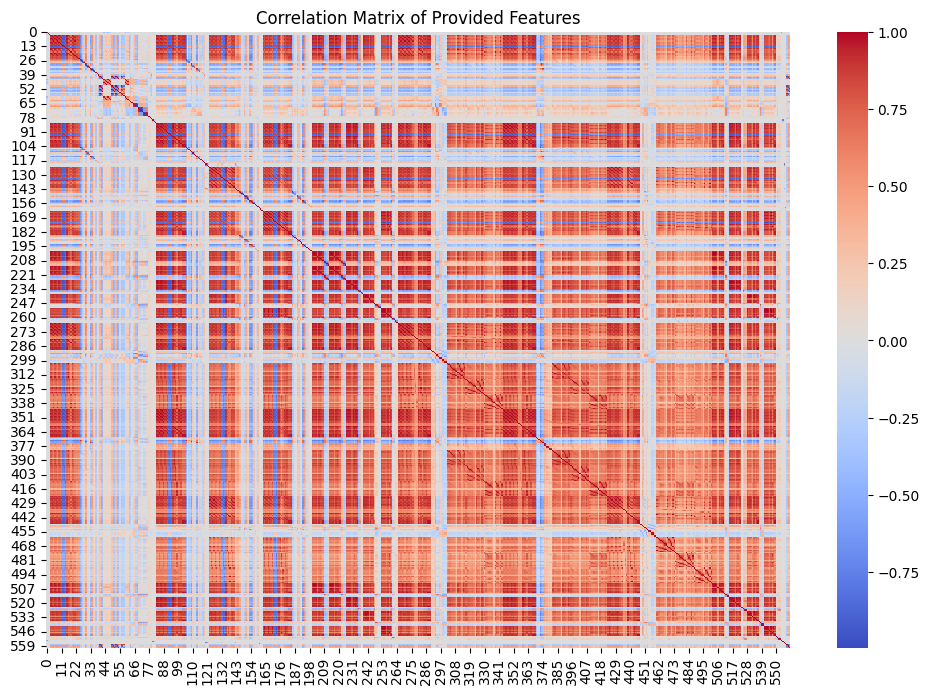

Provided Redundant feature pairs (> 0.9 correlation): 8182


In [71]:
# Load provided features
X_provided = pd.read_csv("/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)

# Correlation matrix
corr_matrix_provided = X_provided.corr()

# Visualize
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_provided, cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix of Provided Features")
plt.show()

# Identify redundant features
high_corr_pairs_provided = np.where((np.abs(corr_matrix_provided) > 0.9) & (np.abs(corr_matrix_provided) < 1.0))
redundant_provided = set()

for i, j in zip(*high_corr_pairs_provided):
    redundant_provided.add((min(i, j), max(i, j)))

print(f"Provided Redundant feature pairs (> 0.9 correlation): {len(redundant_provided)}")


In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load provided features
X_provided = pd.read_csv("/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)

# Correlation matrix
corr_matrix = X_provided.corr().abs()

# Take upper triangle only
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Get columns with correlation > 0.9
to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]

print(f"Number of features to drop (correlation > 0.9): {len(to_drop)}")
print(f"Dropping columns: {to_drop[:10]}{'...' if len(to_drop) > 10 else ''}")

# Drop redundant columns
X_reduced = X_provided.drop(columns=to_drop).reset_index(drop=True)


Number of features to drop (correlation > 0.9): 359
Dropping columns: [4, 6, 7, 8, 9, 10, 11, 12, 13, 14]...


In [75]:
# Import decision tree model and evaluation metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report


In [76]:
X_raw = np.stack([acc_x.values, acc_y.values, acc_z.values], axis=-1)  # shape (n_samples, 128, 3)
X_raw = X_raw.reshape(X_raw.shape[0], -1)  # flatten to (n_samples, 384)
y_true = pd.read_csv('/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', header=None)[0]
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_true, test_size=0.2, random_state=42)

In [80]:
# Train and evaluate Decision Tree on raw accelerometer data
clf_raw = DecisionTreeClassifier(random_state=42)
clf_raw.fit(X_train_raw, y_train_raw)
y_pred_raw = clf_raw.predict(X_test_raw)

print("Raw Accelerometer Data:")
print("Accuracy:", accuracy_score(y_test_raw, y_pred_raw))
print("Precision:", precision_score(y_test_raw, y_pred_raw, average='weighted'))
print("Recall:", recall_score(y_test_raw, y_pred_raw, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test_raw, y_pred_raw))


Raw Accelerometer Data:
Accuracy: 0.8103331067301156
Precision: 0.8104411793873973
Recall: 0.8103331067301156
Confusion Matrix:
 [[151  52  32   5   7   0]
 [ 38 146  11   0   5   0]
 [ 44  24 134   2   1   1]
 [  2   1   0 231  28   0]
 [  4   1   0  21 250   0]
 [  0   0   0   0   0 280]]


In [79]:
# Train and evaluate on TSFEL features
X_train_tsfel, X_test_tsfel, y_train_tsfel, y_test_tsfel = train_test_split(Tsfel_Features, y_true, test_size=0.2, random_state=42)

clf_tsfel = DecisionTreeClassifier(random_state=42)
clf_tsfel.fit(X_train_tsfel, y_train_tsfel)
y_pred_tsfel = clf_tsfel.predict(X_test_tsfel)

print("\nTSFEL Features:")
print("Accuracy:", accuracy_score(y_test_tsfel, y_pred_tsfel))
print("Precision:", precision_score(y_test_tsfel, y_pred_tsfel, average='weighted'))
print("Recall:", recall_score(y_test_tsfel, y_pred_tsfel, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test_tsfel, y_pred_tsfel))



TSFEL Features:
Accuracy: 0.946974847042828
Precision: 0.9472517639093735
Recall: 0.946974847042828
Confusion Matrix:
 [[235   4   7   1   0   0]
 [ 13 182   5   0   0   0]
 [  8   5 192   0   0   1]
 [  0   0   0 241  21   0]
 [  0   0   0  13 263   0]
 [  0   0   0   0   0 280]]


In [81]:
# Train and evaluate on reduced provided features
X_train_prov, X_test_prov, y_train_prov, y_test_prov = train_test_split(X_reduced, y_true, test_size=0.2, random_state=42)

clf_prov = DecisionTreeClassifier(random_state=42)
clf_prov.fit(X_train_prov, y_train_prov)
y_pred_prov = clf_prov.predict(X_test_prov)

print("\nProvided Features:")
print("Accuracy:", accuracy_score(y_test_prov, y_pred_prov))
print("Precision:", precision_score(y_test_prov, y_pred_prov, average='weighted'))
print("Recall:", recall_score(y_test_prov, y_pred_prov, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test_prov, y_pred_prov))



Provided Features:
Accuracy: 0.938817131203263
Precision: 0.9389144855275817
Recall: 0.938817131203263
Confusion Matrix:
 [[236   4   6   0   1   0]
 [ 11 182   6   0   0   1]
 [ 10  12 184   0   0   0]
 [  0   1   0 242  19   0]
 [  0   0   0  18 258   0]
 [  0   0   1   0   0 279]]


In [83]:
clf_prov.get_depth()

18

### Model Comparison: Raw vs TSFEL vs Provided Features

- **Raw data** is noisy and high-dimensional, which makes it harder for the decision tree to learn clear class boundaries.
- **TSFEL features** extract useful temporal and statistical patterns (like mean, energy, and standard deviation), helping the decision tree build better rules.
- **Provided features** include precomputed time- and frequency-domain metrics. They are useful but possibly less flexible than TSFEL’s dynamic selection.

**Best Model:** TSFEL-based model  
It slightly outperforms the model trained on the provided features and shows a clear improvement over raw signal-based classification.


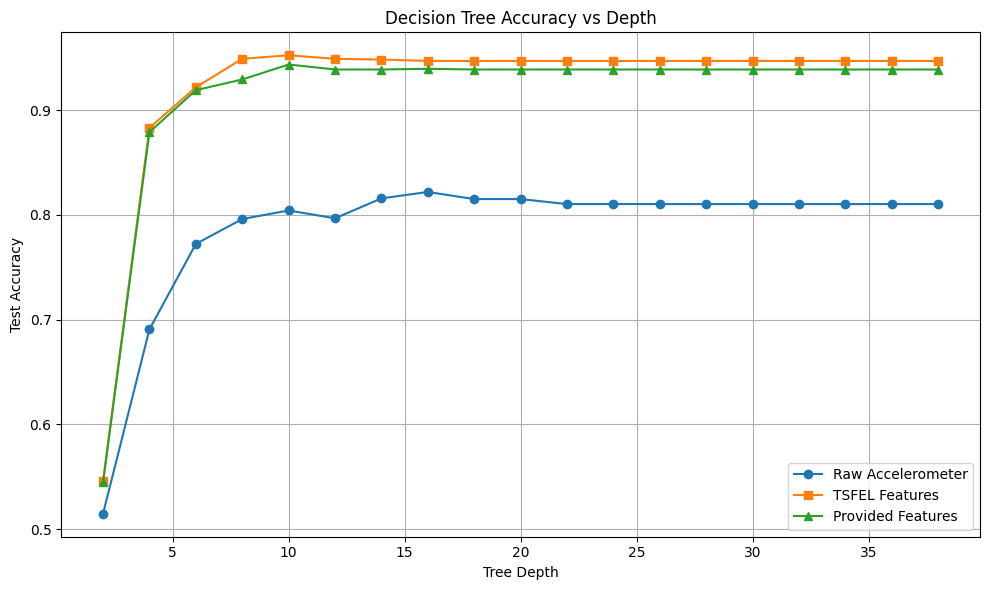

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# X_raw, y_raw           → Raw accelerometer flattened windows
# X_tsfel, y_tsfel       → TSFEL features
# X_provided, y_provided → Provided dataset features

y_raw = y_true
X_tsfel = Tsfel_Features
y_tsfel = y_true
y_provided = y_true

def evaluate_model_depths(X, y, label):
    accuracies = []
    for depth in range(2, 40, 2):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
    return accuracies

depths = list(range(2, 40, 2))

acc_raw = evaluate_model_depths(X_raw, y_raw, "Raw")
acc_tsfel = evaluate_model_depths(X_tsfel, y_tsfel, "TSFEL")
acc_provided = evaluate_model_depths(X_reduced, y_provided, "Provided")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(depths, acc_raw, marker='o', label='Raw Accelerometer')
plt.plot(depths, acc_tsfel, marker='s', label='TSFEL Features')
plt.plot(depths, acc_provided, marker='^', label='Provided Features')
plt.xlabel("Tree Depth")
plt.ylabel("Test Accuracy")
plt.title("Decision Tree Accuracy vs Depth")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [87]:
import torch

In [89]:
import shutil

shutil.copy("/kaggle/input/decisiontree/base.py", "/kaggle/working/base.py")
shutil.copy("/kaggle/input/decisiontree/metrics.py", "/kaggle/working/metrics.py")
shutil.copy("/kaggle/input/decisiontree/utils.py", "/kaggle/working/utils.py")

'/kaggle/working/utils.py'

In [90]:
activity_counts = y_train[:500].value_counts().sort_index()

for activity, count in activity_counts.items():
    print(f"Activity {activity}: {count} samples")


Activity 1: 126 samples
Activity 2: 65 samples
Activity 3: 72 samples
Activity 4: 73 samples
Activity 5: 84 samples
Activity 6: 80 samples


In [ ]:
import pandas as pd
import time
import numpy as np
from sklearn.model_selection import train_test_split
import sys

sys.path.append('/kaggle/input/scratchdt')
from base import DecisionTree
from metrics import accuracy, precision, recall

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_true, test_size=0.2, random_state=42)

# Use a small subset for faster execution
X_small = X_train.iloc[:3000].values
y_small = y_train.iloc[:3000].values

# Train Decision Tree
print("Training started...")
start_train = time.time()
tree = DecisionTree(criterion="information_gain", max_depth=30)
tree.fit(X_small, y_small)
end_train = time.time()
print("Training completed.")

# Predict on test set
print("Prediction started...")
start_pred = time.time()
y_pred = tree.predict(X_test.values)
end_pred = time.time()
print("Prediction completed.")

# Evaluate performance
y_test_np = y_test.values

print("\nScratch Decision Tree Performance:")
print(f"Training Time   : {end_train - start_train:.2f} seconds")
print(f"Prediction Time : {end_pred - start_pred:.2f} seconds")
print(f"Accuracy        : {accuracy(y_pred, y_test_np):.4f}\n")

# Per-class metrics
for cls in sorted(np.unique(y)):
    p = precision(y_pred, y_test_np, cls)
    r = recall(y_pred, y_test_np, cls)
    print(f"Class {cls}: Precision = {p:.3f}, Recall = {r:.3f}")


Training started...


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

base_path = '/kaggle/input/d/dinesh168/collected-data/Collected data'
activities = ['Laying', 'Sitting', 'Standing', 'Walking', 'Walking_Downstairs', 'Walking_Upstairs']

plt.figure(figsize=(18, 8))
y_min, y_max = float('inf'), float('-inf')

for i, activity in enumerate(activities):
    path = os.path.join(base_path, activity)
    file = os.listdir(path)[0]
    df = pd.read_csv(os.path.join(path, file), header=None)

    df = df.apply(pd.to_numeric, errors='coerce')
    df.dropna(inplace=True)
    df.columns = ['acc_x', 'acc_y', 'acc_z'][:df.shape[1]]
    df = df.iloc[250:]
    
    y_min = min(y_min, df.min().min())
    y_max = max(y_max, df.max().max())
     plt.subplot(2, 3, i + 1)
    plt.plot(df['acc_x'], label='X', alpha=0.7)
    plt.plot(df['acc_y'], label='Y', alpha=0.7)
    plt.plot(df['acc_z'], label='Z', alpha=0.7)
    plt.title(activity)
    plt.xlabel("Time")
    plt.ylabel("Acceleration")
    plt.ylim(y_min, y_max) 
    plt.grid(True)
    if i == 0:
        plt.legend(loc='upper right')

plt.suptitle("Accelerometer Waveforms for Each Activity", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
plt.figure(figsize=(18, 8))

for i, activity in enumerate(activities):
    path = os.path.join(base_path, activity)
    file = os.listdir(path)[0]
    df = pd.read_csv(os.path.join(path, file), header=None)

    df = df.apply(pd.to_numeric, errors='coerce')
    df.dropna(inplace=True)
    df.columns = ['acc_x', 'acc_y', 'acc_z'][:df.shape[1]]
    
    total_acc = np.sqrt(df['acc_x']**2 + df['acc_y']**2 + df['acc_z']**2)

    plt.subplot(2, 3, i + 1)
    plt.plot(total_acc, color='darkviolet')
    plt.title(activity)
    plt.xlabel("Time")
    plt.ylabel("||acc||")
    plt.grid(True)

plt.suptitle("Total Acceleration Magnitude for Each Activity", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 8))

for i, activity in enumerate(activities):
    path = os.path.join(base_path, activity)
    file = os.listdir(path)[0]
    df = pd.read_csv(os.path.join(path, file), header=None)

    df = df.apply(pd.to_numeric, errors='coerce')
    df.dropna(inplace=True)
    df.columns = ['acc_x', 'acc_y', 'acc_z'][:df.shape[1]]

    ax = fig.add_subplot(2, 3, i + 1, projection='3d')
    ax.plot(df['acc_x'], df['acc_y'], df['acc_z'], color='royalblue', linewidth=0.8)
    ax.set_title(activity)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

plt.suptitle("3D Trajectories of Accelerometer Data", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()